In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [5]:
import yfinance as yf
import datetime
from datetime import date

# Define the ticker symbol and date range
ticker = '^NSEBANK'
start_date = datetime.datetime(2007, 1, 1)
end_date = date.today()

# Fetch the data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Select the adjusted close prices
print(data.columns)
data = data[['Adj Close']]
data.columns = ['Close']

# Display the first few rows of the data
print(data.head())
print(data.shape)


[*********************100%%**********************]  1 of 1 completed

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                  Close
Date                   
2007-09-17  6897.020020
2007-09-18  7059.567871
2007-09-19  7401.764160
2007-09-20  7390.063965
2007-09-21  7464.413086
(3830, 1)


In [6]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 3830 number of days in the dataset.


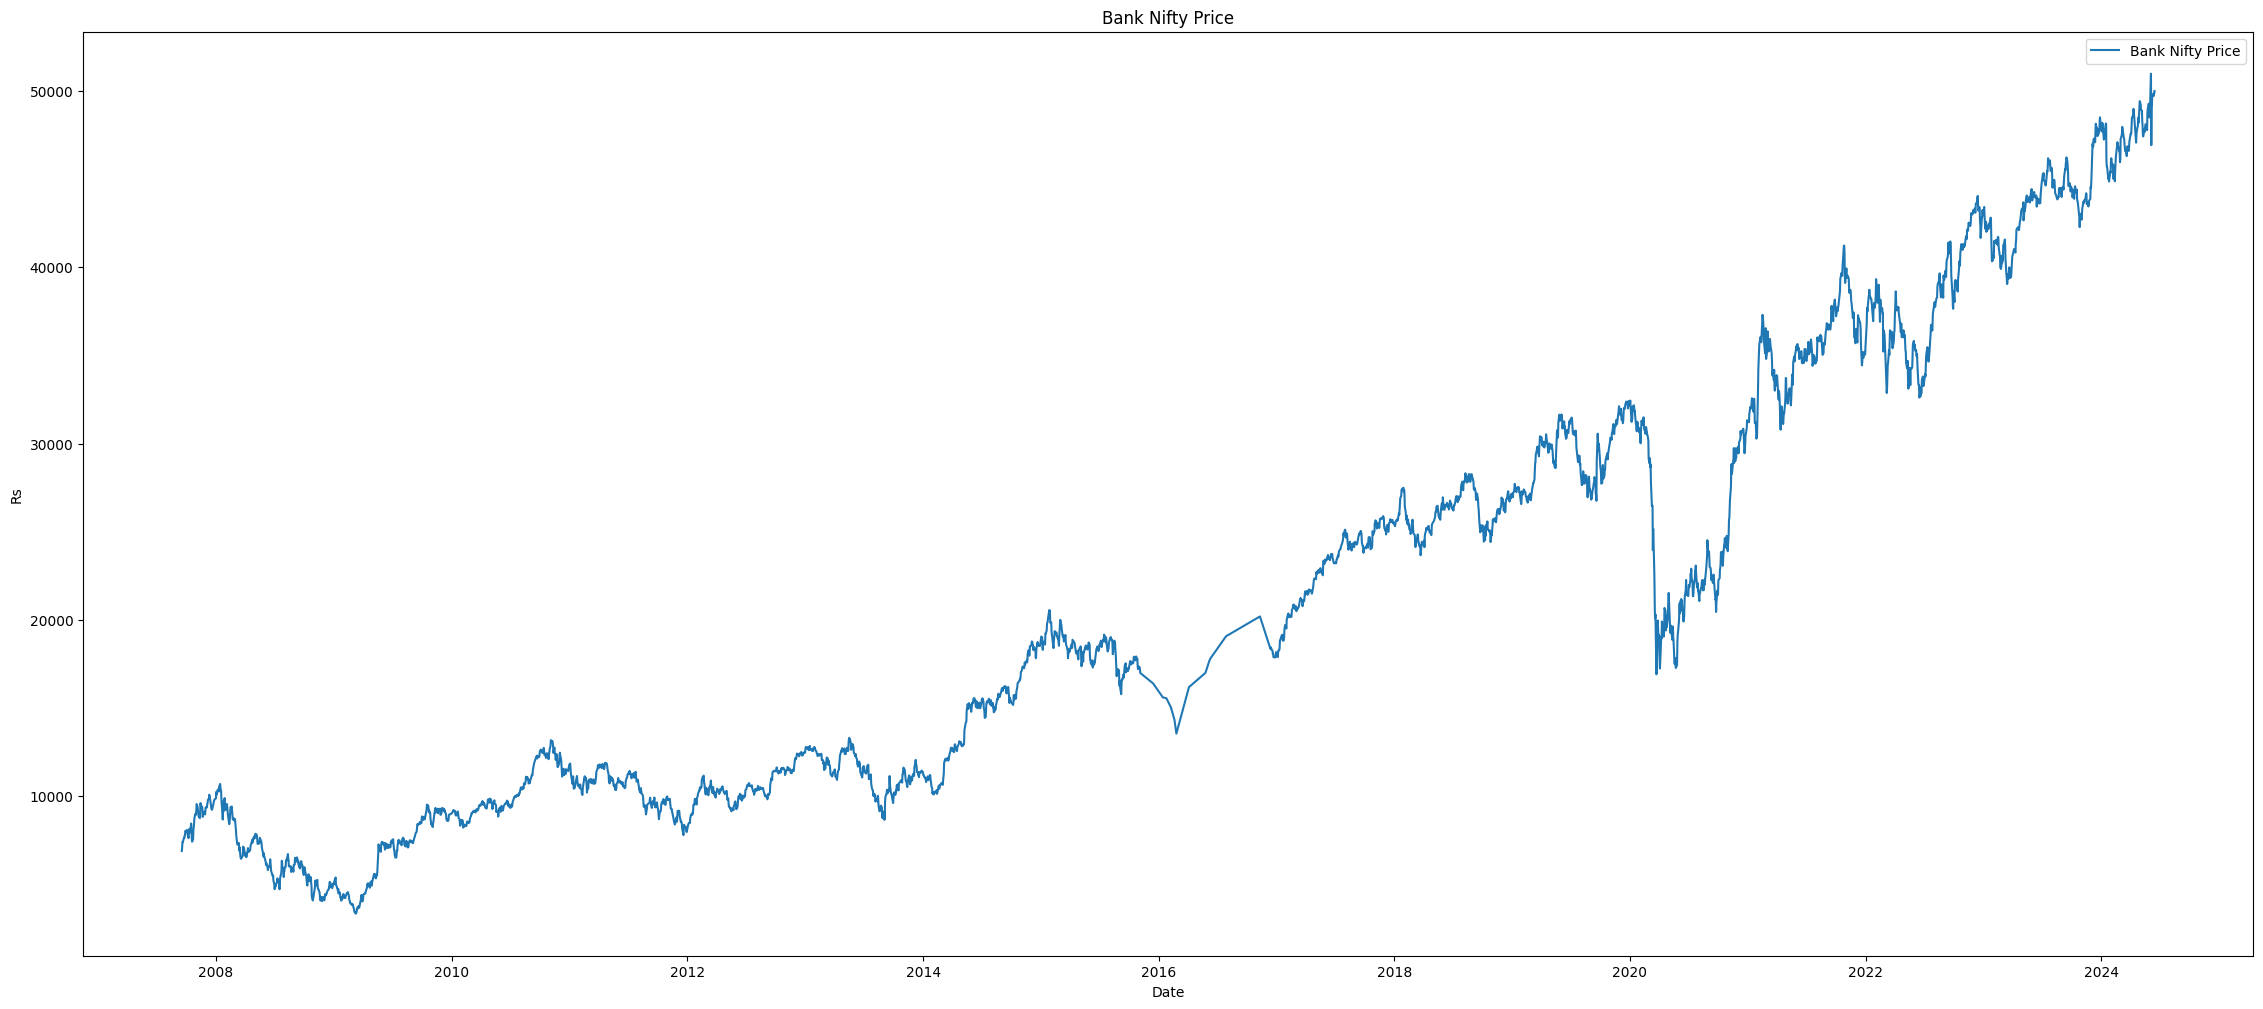

In [7]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['Close'], label='Bank Nifty Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Bank Nifty Price')
plt.legend()
plt.show()

In [8]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [9]:
df = get_technical_indicators(data)

C:\Users\g6kan\AppData\Local\Temp\ipykernel_4496\4252838282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
C:\Users\g6kan\AppData\Local\Temp\ipykernel_4496\4252838282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
C:\Users\g6kan\AppData\Local\Temp\ipykernel_4496\4252838282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [10]:
df = df.dropna()
df.head()

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16,8452.101562,8054.791922,7784.471354,7923.731019,8042.612357,118.881339,386.856369,8558.184092,7010.758617,8363.607803,8451.101562,9.042052
2007-10-17,8099.805664,8122.434012,7841.746861,7939.713390,8051.640133,111.926742,334.374992,8510.496844,7172.996878,8187.739710,8098.805664,8.999472
2007-10-18,7608.661621,8081.420201,7867.894182,7910.157159,7981.996045,71.838886,288.470113,8444.834409,7290.953956,7801.687651,7607.661621,8.936911
2007-10-19,7423.713379,7994.728306,7868.939383,7867.378049,7894.519035,27.140986,286.731283,8442.401949,7295.476817,7549.704803,7422.713379,8.912300
2007-10-22,7567.912109,7910.329311,7877.408343,7841.402490,7843.488268,2.085778,274.234037,8425.876416,7328.940269,7561.843007,7566.912109,8.931540


In [11]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

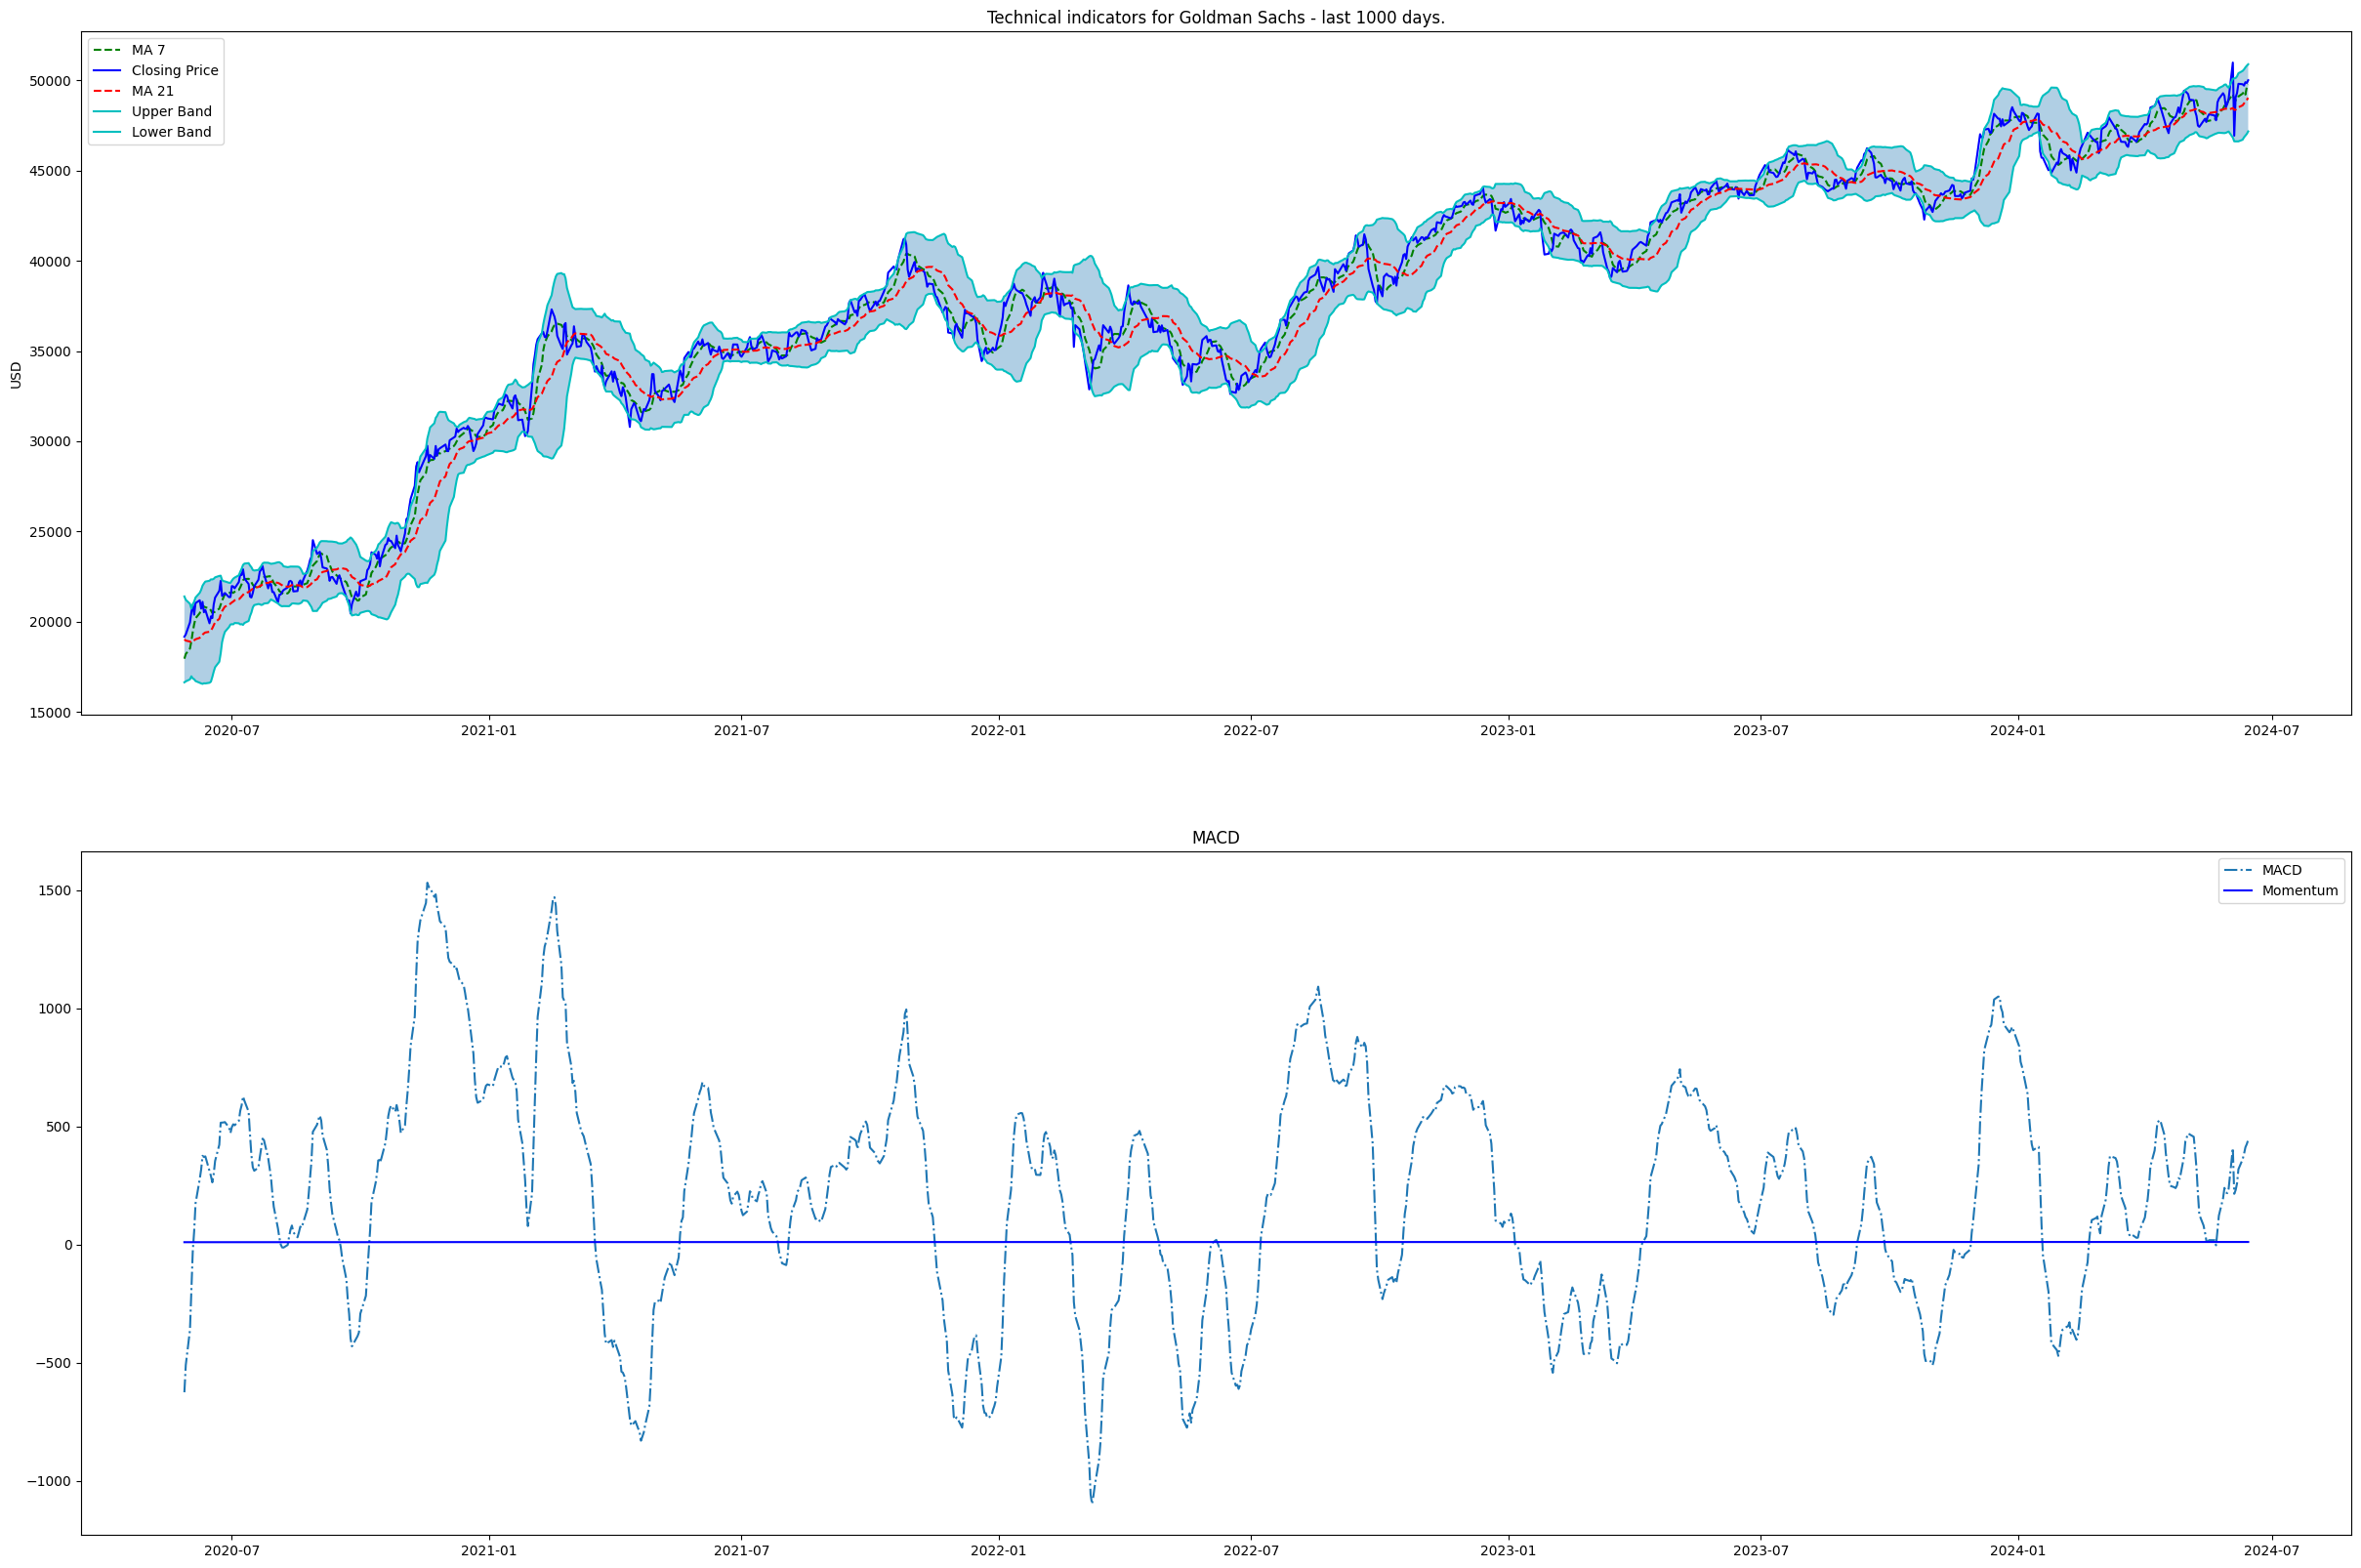

In [12]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

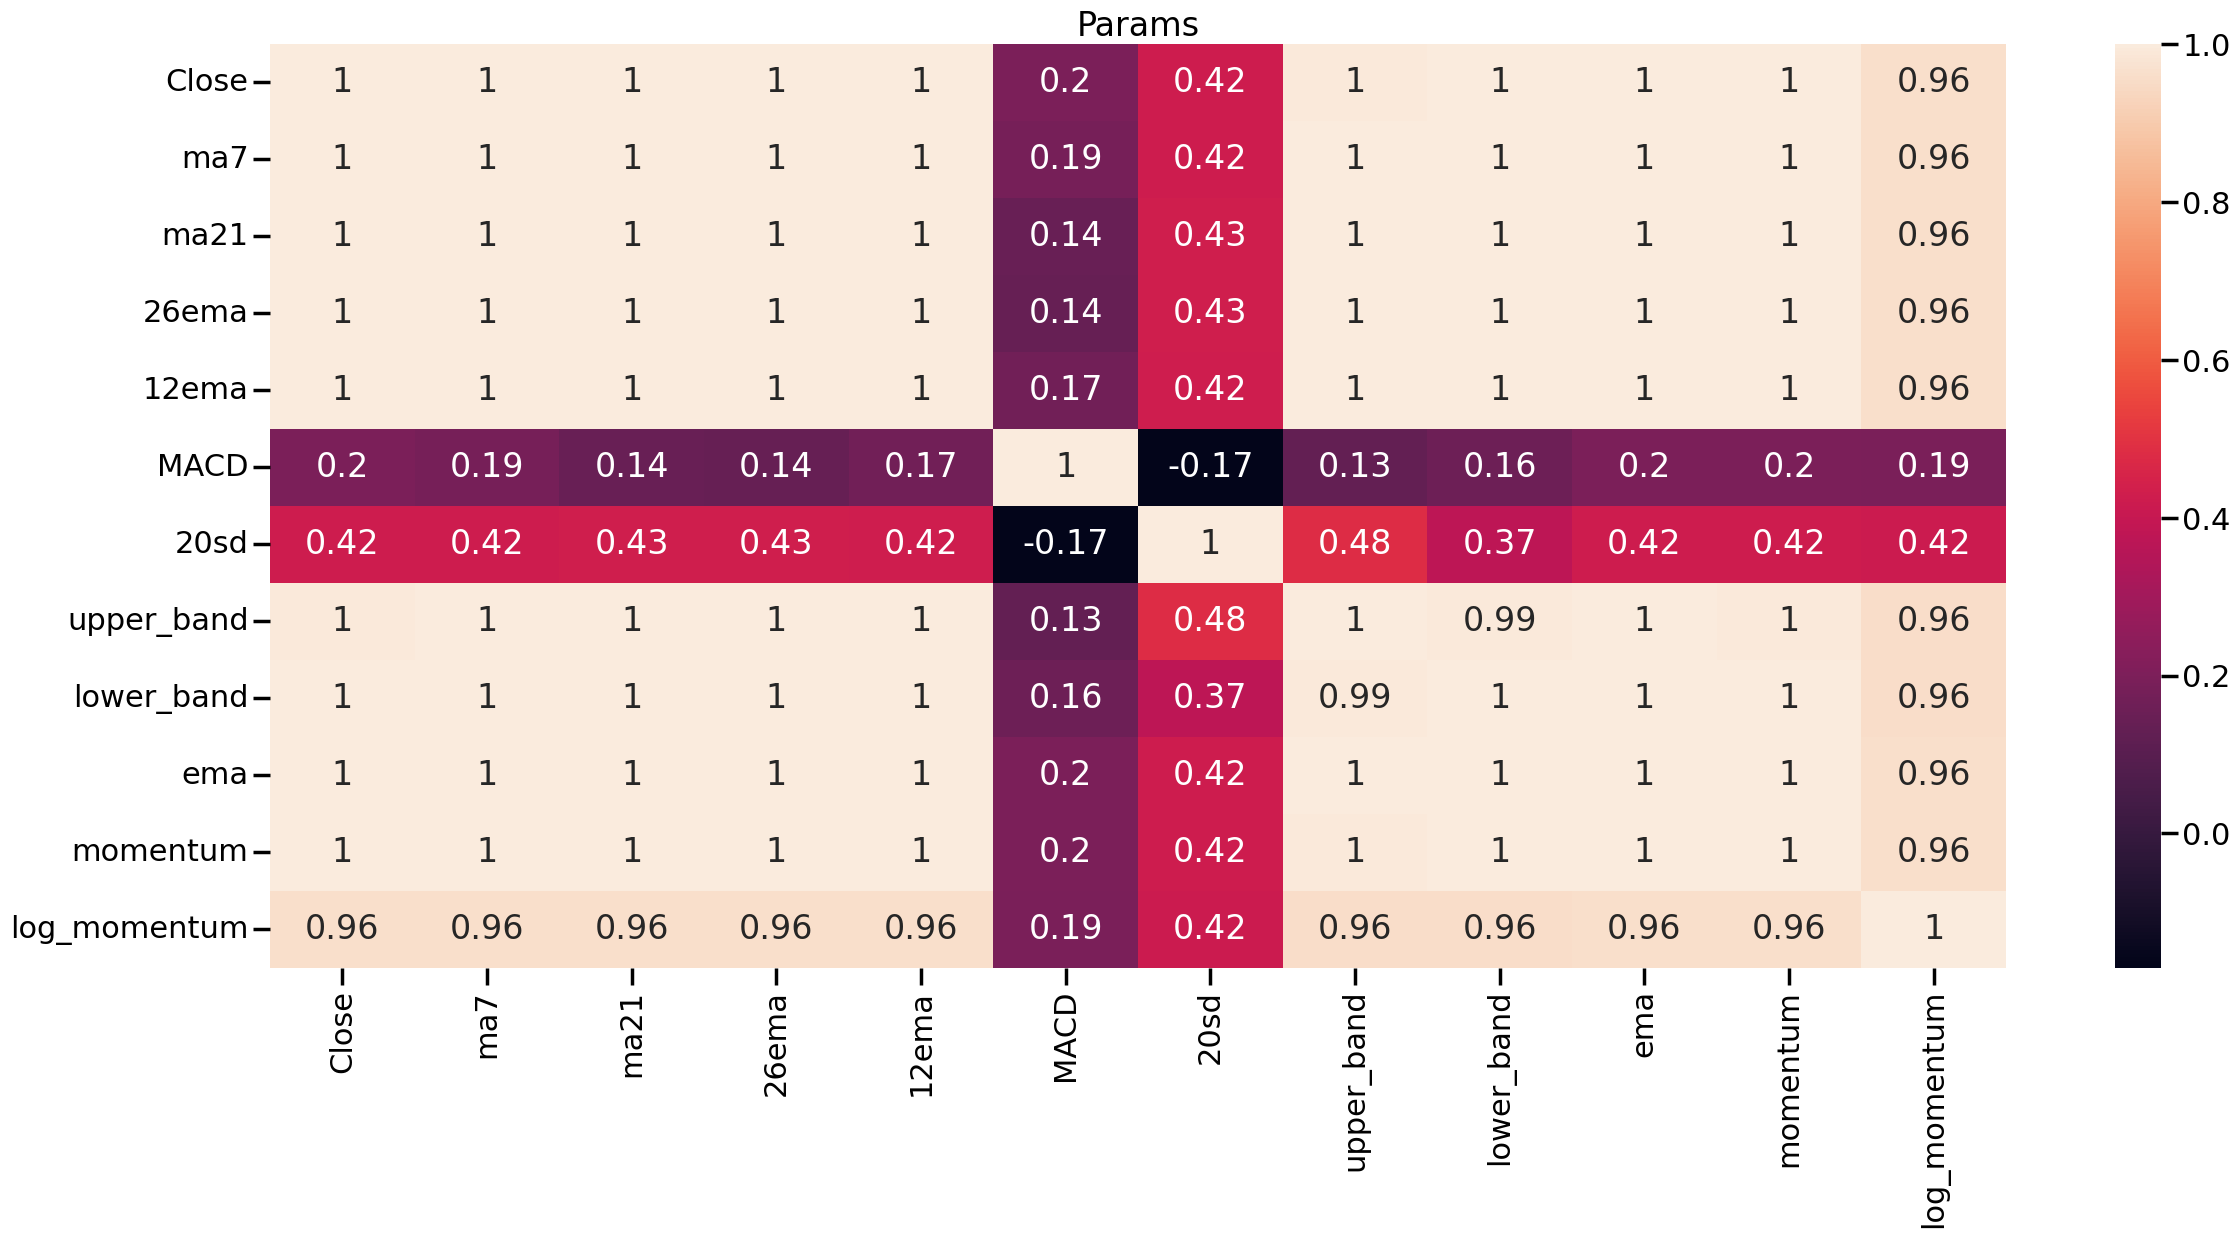

In [13]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [14]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3810 samples, and 12 features.


In [15]:
df.columns

Index(['Close', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [16]:
df

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2007-10-16,8452.101562,8054.791922,7784.471354,7923.731019,8042.612357,118.881339,386.856369,8558.184092,7010.758617,8363.607803,8451.101562,9.042052
2007-10-17,8099.805664,8122.434012,7841.746861,7939.713390,8051.640133,111.926742,334.374992,8510.496844,7172.996878,8187.739710,8098.805664,8.999472
2007-10-18,7608.661621,8081.420201,7867.894182,7910.157159,7981.996045,71.838886,288.470113,8444.834409,7290.953956,7801.687651,7607.661621,8.936911
2007-10-19,7423.713379,7994.728306,7868.939383,7867.378049,7894.519035,27.140986,286.731283,8442.401949,7295.476817,7549.704803,7422.713379,8.912300
2007-10-22,7567.912109,7910.329311,7877.408343,7841.402490,7843.488268,2.085778,274.234037,8425.876416,7328.940269,7561.843007,7566.912109,8.931540
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10,49780.898438,49260.442522,48610.283296,48727.271581,49087.760908,360.489328,952.765078,50515.813452,46704.753141,49710.286094,49779.898438,10.815367
2024-06-11,49705.750000,49363.556920,48719.076079,48799.751464,49182.836153,383.084690,940.546828,50600.169735,46837.982423,49707.262031,49704.750000,10.813856
2024-06-12,49895.101562,49208.578683,48821.028460,48880.888508,49292.415447,411.526939,946.735094,50714.498649,46927.558271,49832.488385,49894.101562,10.817658


In [32]:
data_training = df[df.index < '2020-01-31'].copy()

frame = 10
period = 15

data_training['Avg_per_change'] =  np.nan

for i in range(0 , len(data_training)-frame):
    current_close = data_training.iloc[i]['Close']
    closing_prices = data_training['Close'].iloc[i+1:i+frame+1]
    percent_change = ((closing_prices - current_close)/current_close)*100
    avg_percent_change = percent_change.mean()
    data_training.iat[i, data_training.columns.get_loc('Avg_per_change')] = avg_percent_change

data_training['Avg_per_change']

Date
2007-10-16    -2.813878
2007-10-17     2.540655
2007-10-18    11.249223
2007-10-19    16.899239
2007-10-22    17.089326
                ...    
2020-01-24          NaN
2020-01-27          NaN
2020-01-28          NaN
2020-01-29          NaN
2020-01-30          NaN
Name: Avg_per_change, Length: 2734, dtype: float64

In [34]:
data_testing = df[df.index >= '2020-01-31'].copy()

data_testing['Avg_per_change'] =  np.nan

for i in range(0 , len(data_testing)-frame):
    current_close = data_testing.iloc[i]['Close']
    closing_prices = data_testing['Close'].iloc[i+1:i+frame+1]
    percent_change = ((closing_prices - current_close)/current_close)*100
    avg_percent_change = percent_change.mean()
    data_testing.iat[i, data_testing.columns.get_loc('Avg_per_change')] = avg_percent_change


data_testing

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,Avg_per_change
Date,,,,,,,,,,,,,
2020-01-31,30833.242188,30885.726842,31367.266555,31317.791353,31048.268608,-269.522745,536.613796,32440.494146,30294.038964,30794.597977,30832.242188,10.336316,0.583323
2020-02-03,30022.900391,30745.614118,31269.839100,31221.873504,30890.519651,-331.353853,586.294135,32442.427370,30097.250830,30280.132919,30021.900391,10.309682,3.517126
2020-02-04,30686.341797,30666.321987,31243.627418,31182.204489,30859.107674,-323.096815,599.990201,32443.607820,30043.647016,30550.938838,30685.341797,10.331540,1.238604
2020-02-05,31001.589844,30689.828962,31224.701451,31168.825626,30881.028008,-287.797619,601.110365,32426.922180,30022.480721,30851.372842,31000.589844,10.341762,0.156312
2020-02-06,31303.687500,30767.349609,31221.387277,31178.815395,30946.052545,-232.762850,600.441689,32422.270654,30020.503899,31152.915947,31302.687500,10.351459,-0.925636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10,49780.898438,49260.442522,48610.283296,48727.271581,49087.760908,360.489328,952.765078,50515.813452,46704.753141,49710.286094,49779.898438,10.815367,NaN
2024-06-11,49705.750000,49363.556920,48719.076079,48799.751464,49182.836153,383.084690,940.546828,50600.169735,46837.982423,49707.262031,49704.750000,10.813856,NaN
2024-06-12,49895.101562,49208.578683,48821.028460,48880.888508,49292.415447,411.526939,946.735094,50714.498649,46927.558271,49832.488385,49894.101562,10.817658,NaN


In [36]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(2734, 13)


array([[0.17566223, 0.15805616, 0.1431213 , ..., 0.17566223, 0.40842935,
        0.26540666],
       [0.16355743, 0.16040638, 0.14514206, ..., 0.16355743, 0.38970372,
        0.37242366],
       [0.14668184, 0.15898136, 0.14606458, ..., 0.14668184, 0.36219117,
        0.54647523],
       ...,
       [0.94219212, 0.95315806, 0.98288722, ..., 0.94219212, 0.97658123,
               nan],
       [0.94616403, 0.95214724, 0.98040428, ..., 0.94616403, 0.97823082,
               nan],
       [0.93827517, 0.95065745, 0.97786027, ..., 0.93827517, 0.97494838,
               nan]])

In [35]:
X_train = []
y_train = []

In [37]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [38]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((2674, 60, 13), (2674,))

In [249]:
regressor = Sequential()
# 1st layer with Dropout regularisation
# * units = add 100 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
# * input_shape => Shape of the training dataset
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 12)))
# 20% of the layers will be dropped
regressor.add(Dropout(0.2))
# 2nd LSTM layer
# * units = add 50 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
regressor.add(LSTM(units=50, return_sequences=True))
# 20% of the layers will be dropped
regressor.add(Dropout(0.2))
# 3rd LSTM layer
# * units = add 50 neurons is the dimensionality of the output space
# * return_sequences = True to stack LSTM layers so the next LSTM layer has a three-dimensional sequence input
regressor.add(LSTM(units=50, return_sequences=True))
# 50% of the layers will be dropped
regressor.add(Dropout(0.5))
# 4th LSTM layer
# * units = add 50 neurons is the dimensionality of the output space
regressor.add(LSTM(units=50))
# 50% of the layers will be dropped
regressor.add(Dropout(0.5))
# Dense layer that specifies an output of one unit
regressor.add(Dense(units=1))
regressor.summary()

c:\Users\g6kan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 60, 100)        │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 60, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,851 (452.54 KB)

 Trainable params: 115,851 (452.54 KB)

 Non-trainable params: 0 (0.00 B)

In [250]:
regressor.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 60, 100)        │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 60, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,851 (452.54 KB)

 Trainable params: 115,851 (452.54 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [252]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 0.0663
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0101
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0111
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0099
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0066
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0070
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0069
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0067
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0064
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0055
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0080
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0055
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0052
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0053
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0090
Epoc

In [ ]:
past_60 = data_training.tail(60)
dt = pd.concat([past_60, data_testing], ignore_index=True)
# print(dt.columns)
dt.shape

(1136, 12)

In [ ]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(1136, 12)


array([[0.39051879, 0.38410668, 0.33836658, ..., 0.39012074, 0.39051879,
        0.52593041],
       [0.40196088, 0.38951836, 0.34183155, ..., 0.39751199, 0.40196088,
        0.53754751],
       [0.40265228, 0.39290765, 0.34641042, ..., 0.40045363, 0.40265228,
        0.53824474],
       ...,
       [0.96815126, 0.98276352, 0.99321076, ..., 0.98631103, 0.96815126,
        0.98050087],
       [0.96673027, 0.99577549, 0.9963471 , ..., 0.98659939, 0.96673027,
        0.97962103],
       [0.97128956, 1.        , 1.        , ..., 0.9898468 , 0.97128956,
        0.98244101]])

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1076, 60, 12), (1076,))

In [ ]:
y_pred = regressor.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


In [ ]:
y_pred

array([[0.44895667],
       [0.44654876],
       [0.4441427 ],
       ...,
       [0.94938064],
       [0.95108044],
       [0.9528798 ]], dtype=float32)

In [ ]:
scale = 1/scalar.scale_[0]

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

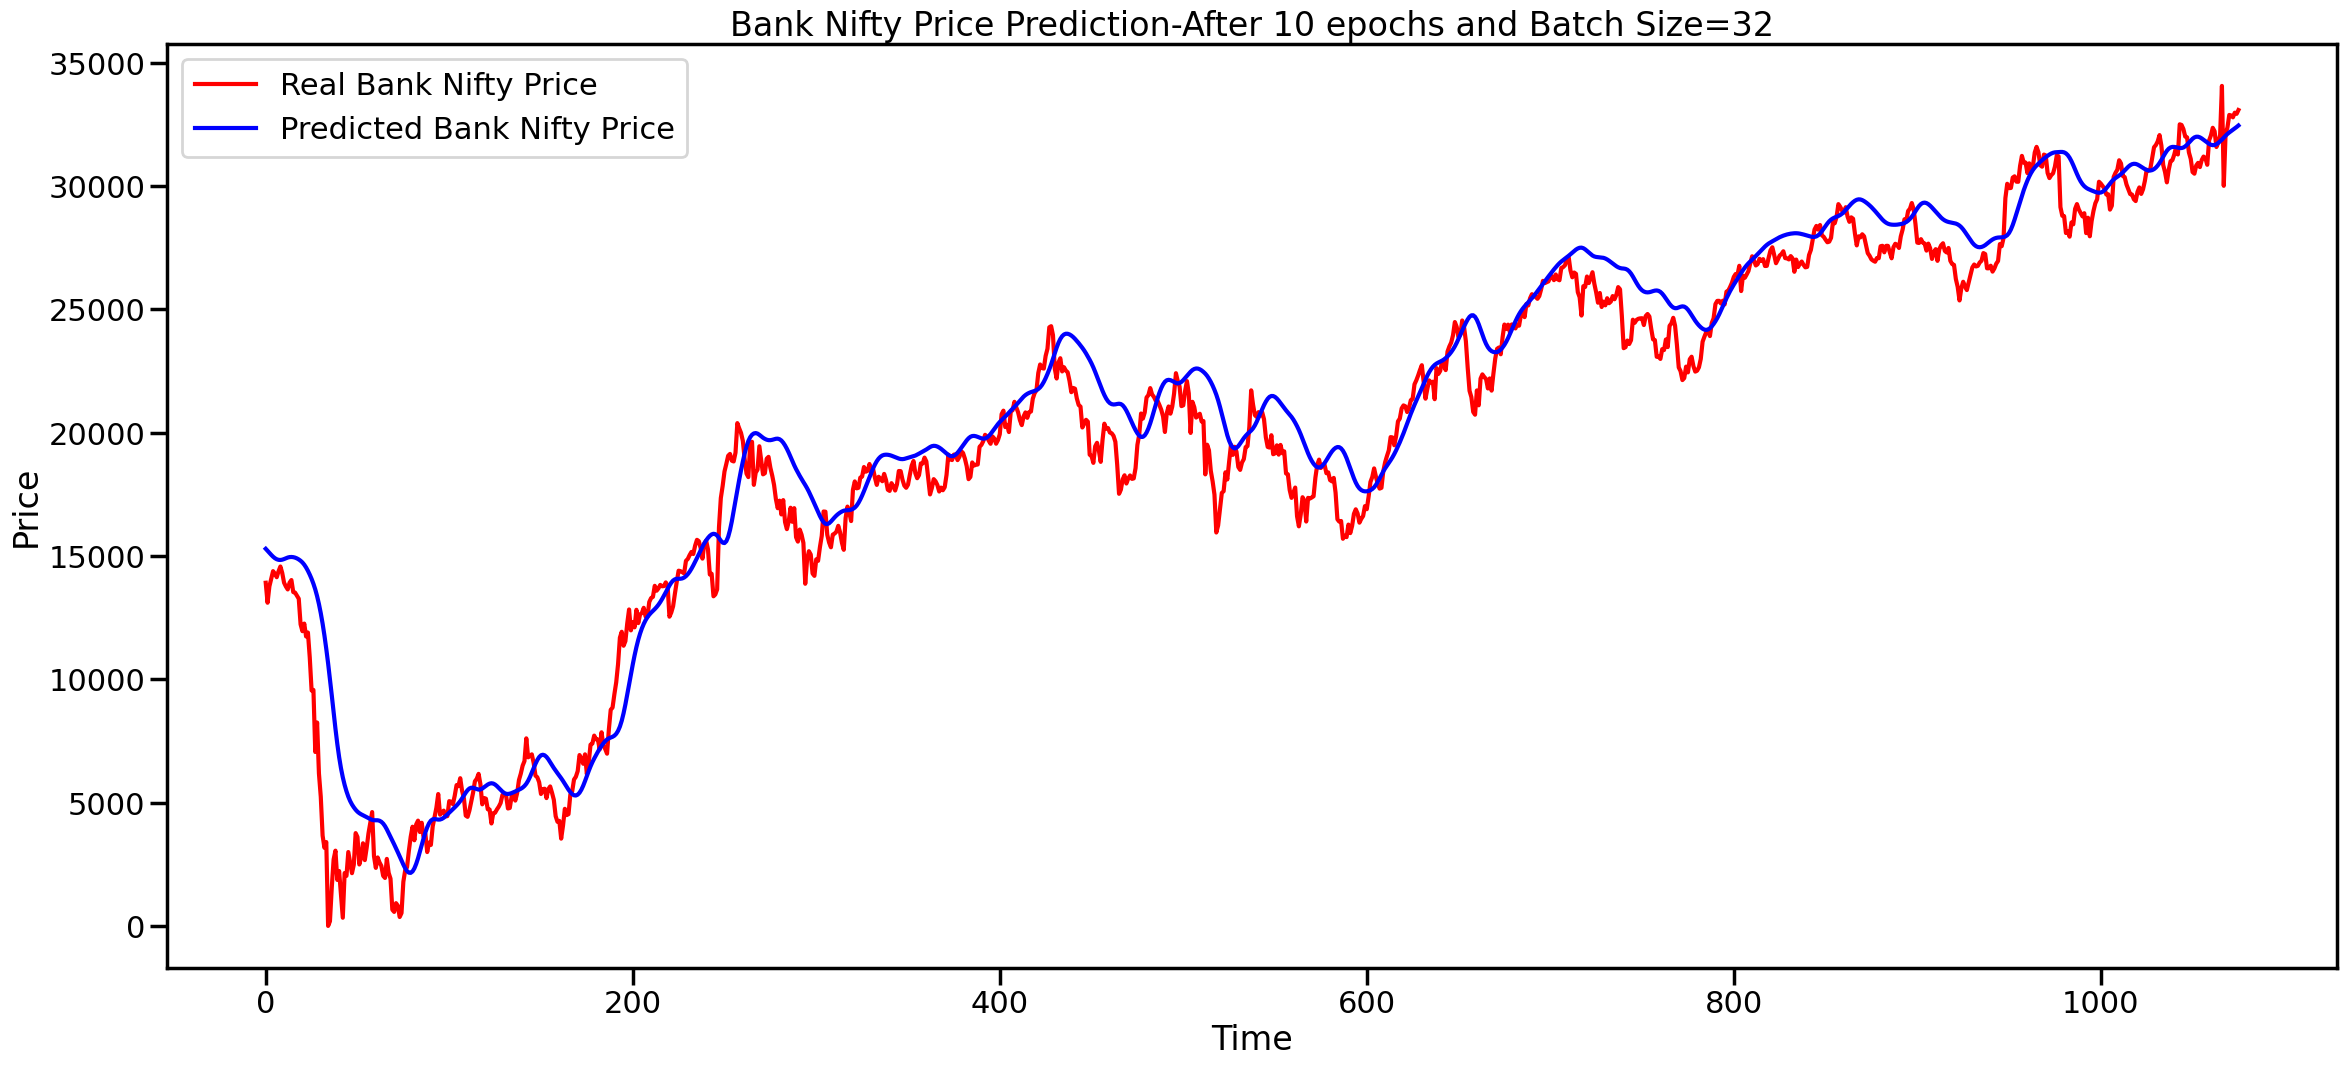

In [ ]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

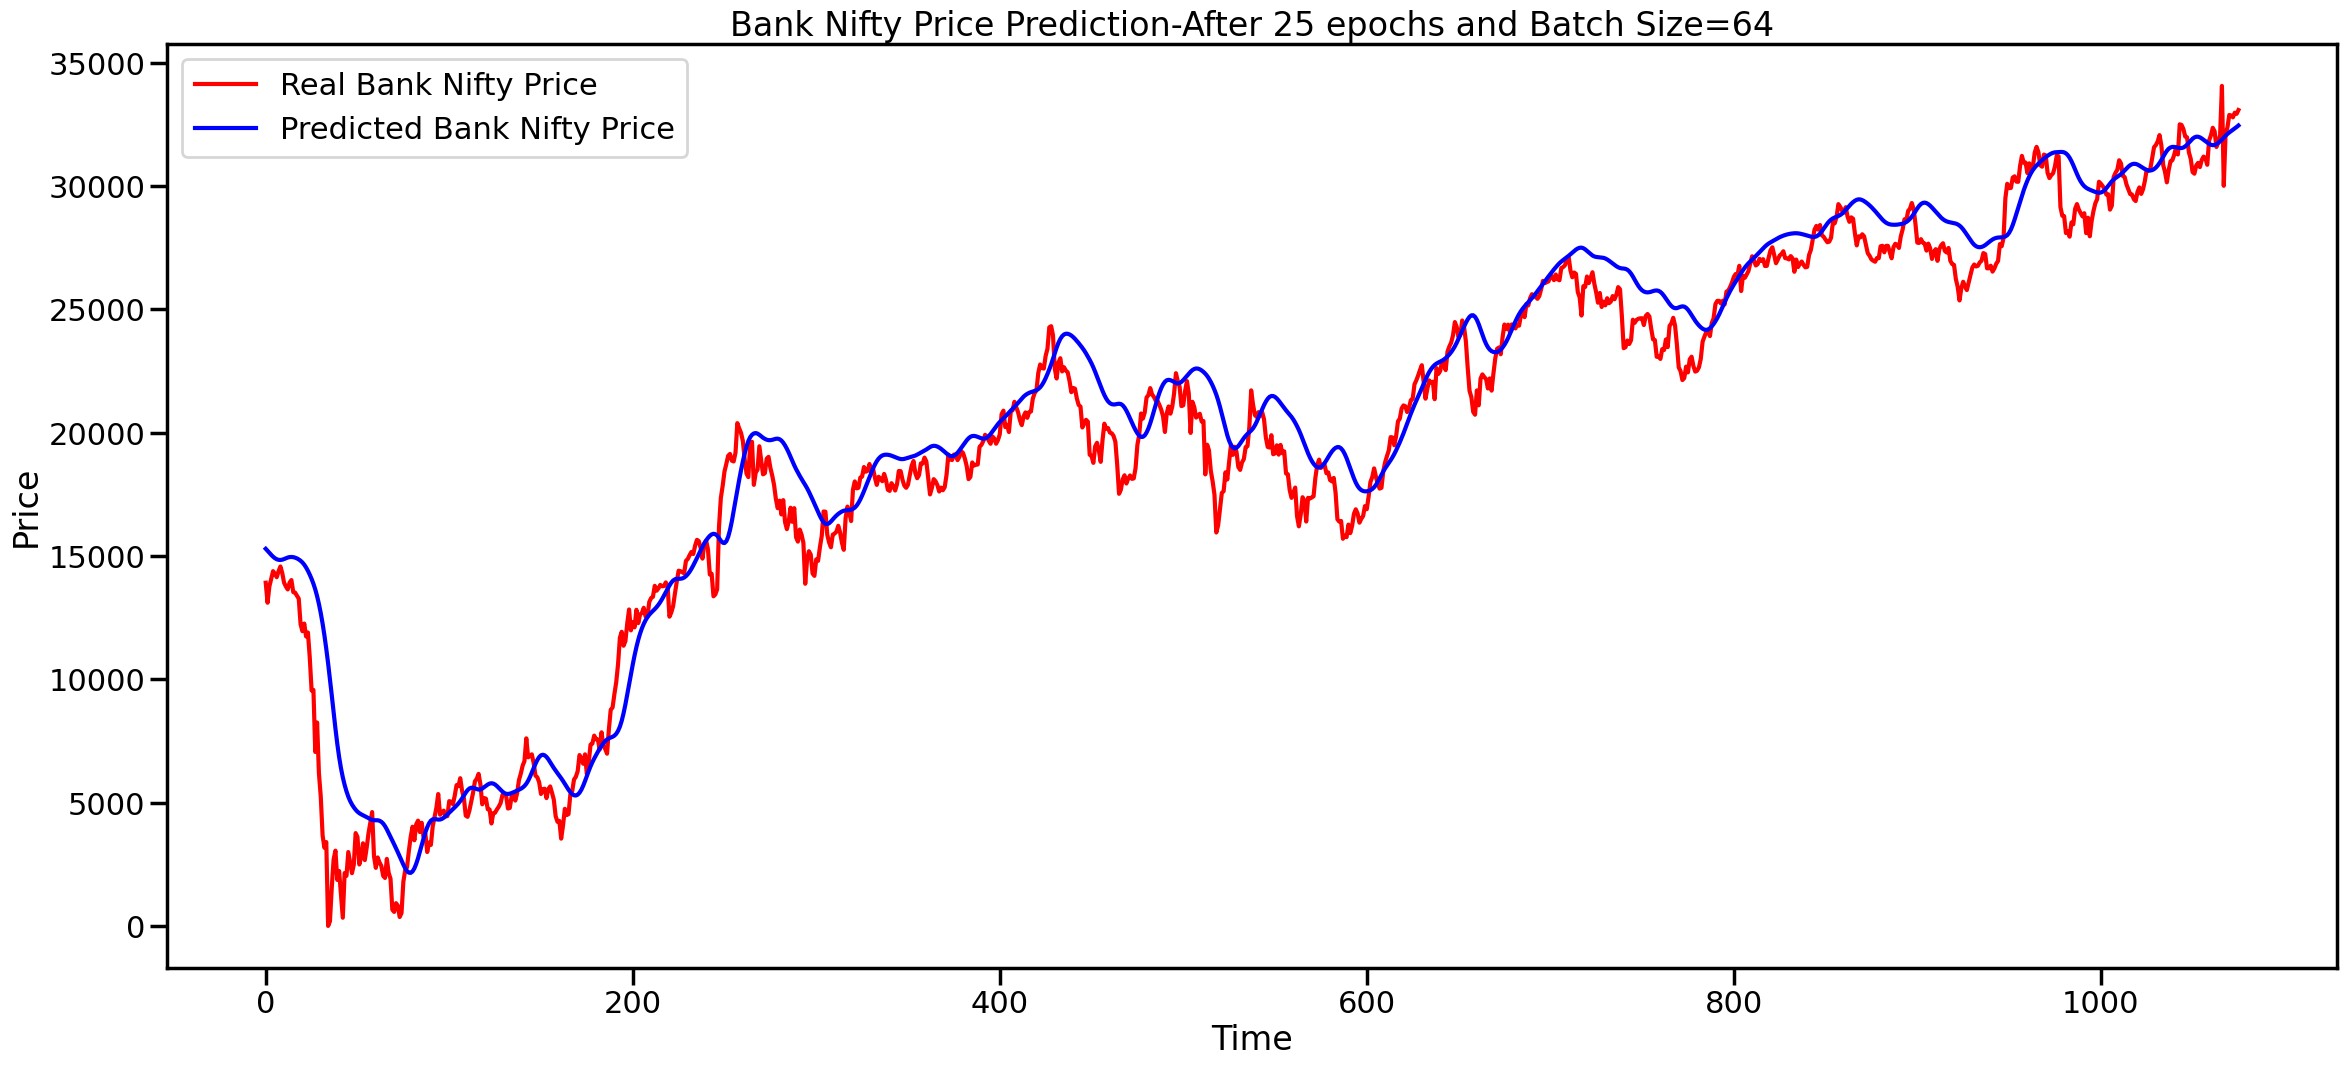

In [ ]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

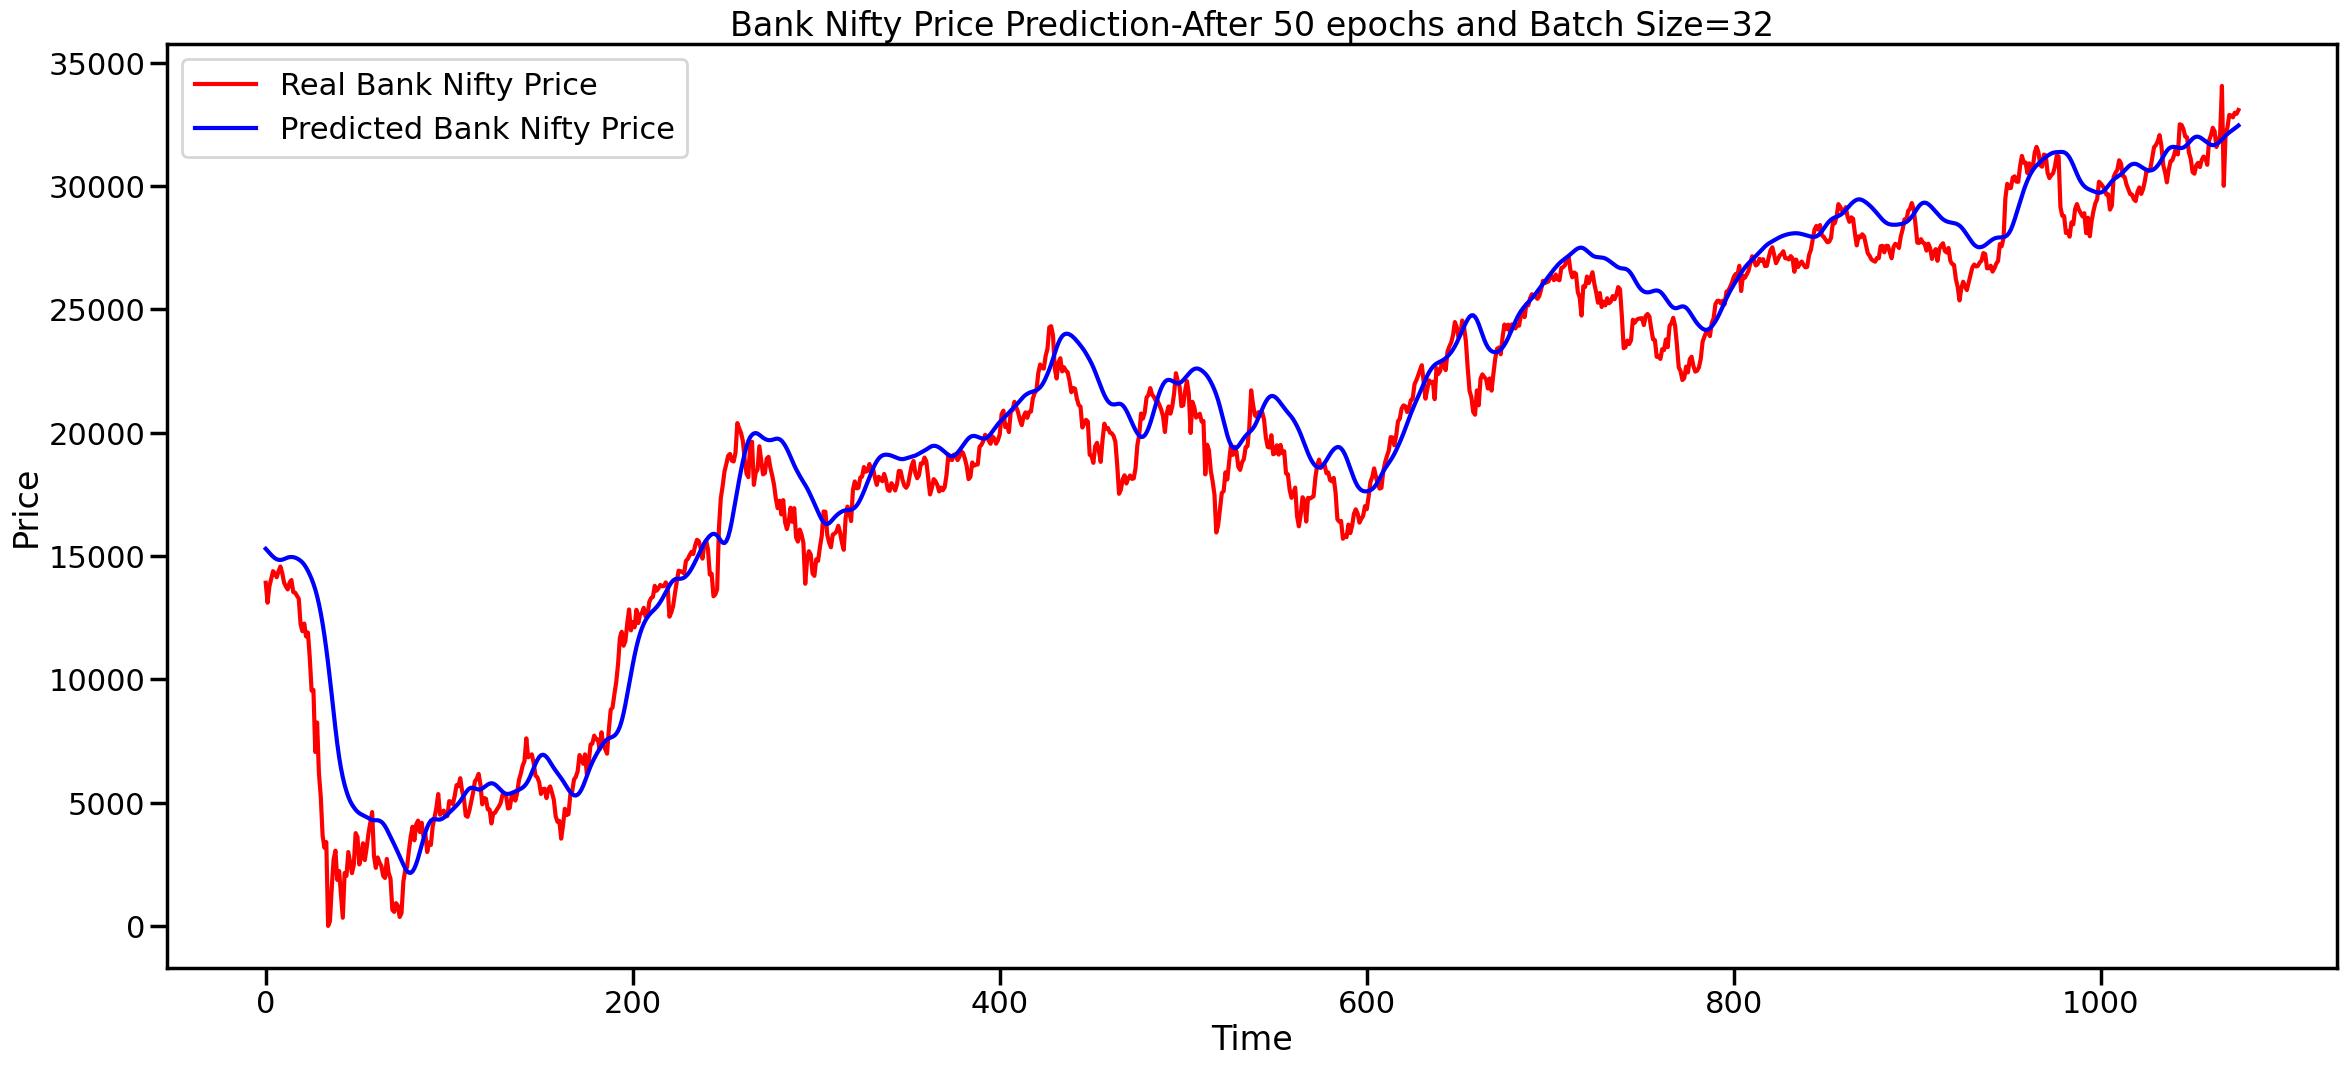

In [ ]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [285]:
# accuracy 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 284910656.0000
[test loss, test accuracy]: 300048960.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
CONFUSION MATRIX: 



InvalidParameterError: The 'y_true' parameter of confusion_matrix must be an array-like. Got 90 instead.

In [ ]:
past_60 = data_training.tail(60)
print(past_60.shape)
# print(data_testing.shape)
dt = pd.concat([past_60, data_testing.tail(100)], ignore_index=True)
# print(dt.columns)
dt.shape

(60, 12)


(160, 12)

In [ ]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
# inputs

(160, 12)


In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((100, 60, 12), (100,))

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.08019394],
       [0.08500171],
       [0.10851716],
       [0.15402818],
       [0.21810561],
       [0.29327762],
       [0.37098104],
       [0.44420776],
       [0.5084231 ],
       [0.56178117],
       [0.6042758 ],
       [0.6372242 ],
       [0.6625403 ],
       [0.682107  ],
       [0.6974859 ],
       [0.70981693],
       [0.71995056],
       [0.7282363 ],
       [0.7350434 ],
       [0.74045956],
       [0.7447094 ],
       [0.74822795],
       [0.75154984],
       [0.7551605 ],
       [0.7598418 ],
       [0.76621985],
       [0.7744763 ],
       [0.7842902 ],
       [0.79492784],
       [0.80554366],
       [0.8151729 ],
       [0.8231026 ],
       [0.8294363 ],
       [0.83472025],
       [0.8395797 ],
       [0.8446158 ],
       [0.8501289 ],
       [0.8559185 ],
       [0.86152124],
       [0.86636376],
       [0.86989796],
       [0.87174046],
       [0.8717779 ],
       [0.8700943 ],
       [0.8669262 ],
       [0.86275196],
       [0.8581883 ],
       [0.853

In [ ]:
scale = 1/scalar.scale_[0]

y_pred = y_pred*scale
y_test = y_test*scale

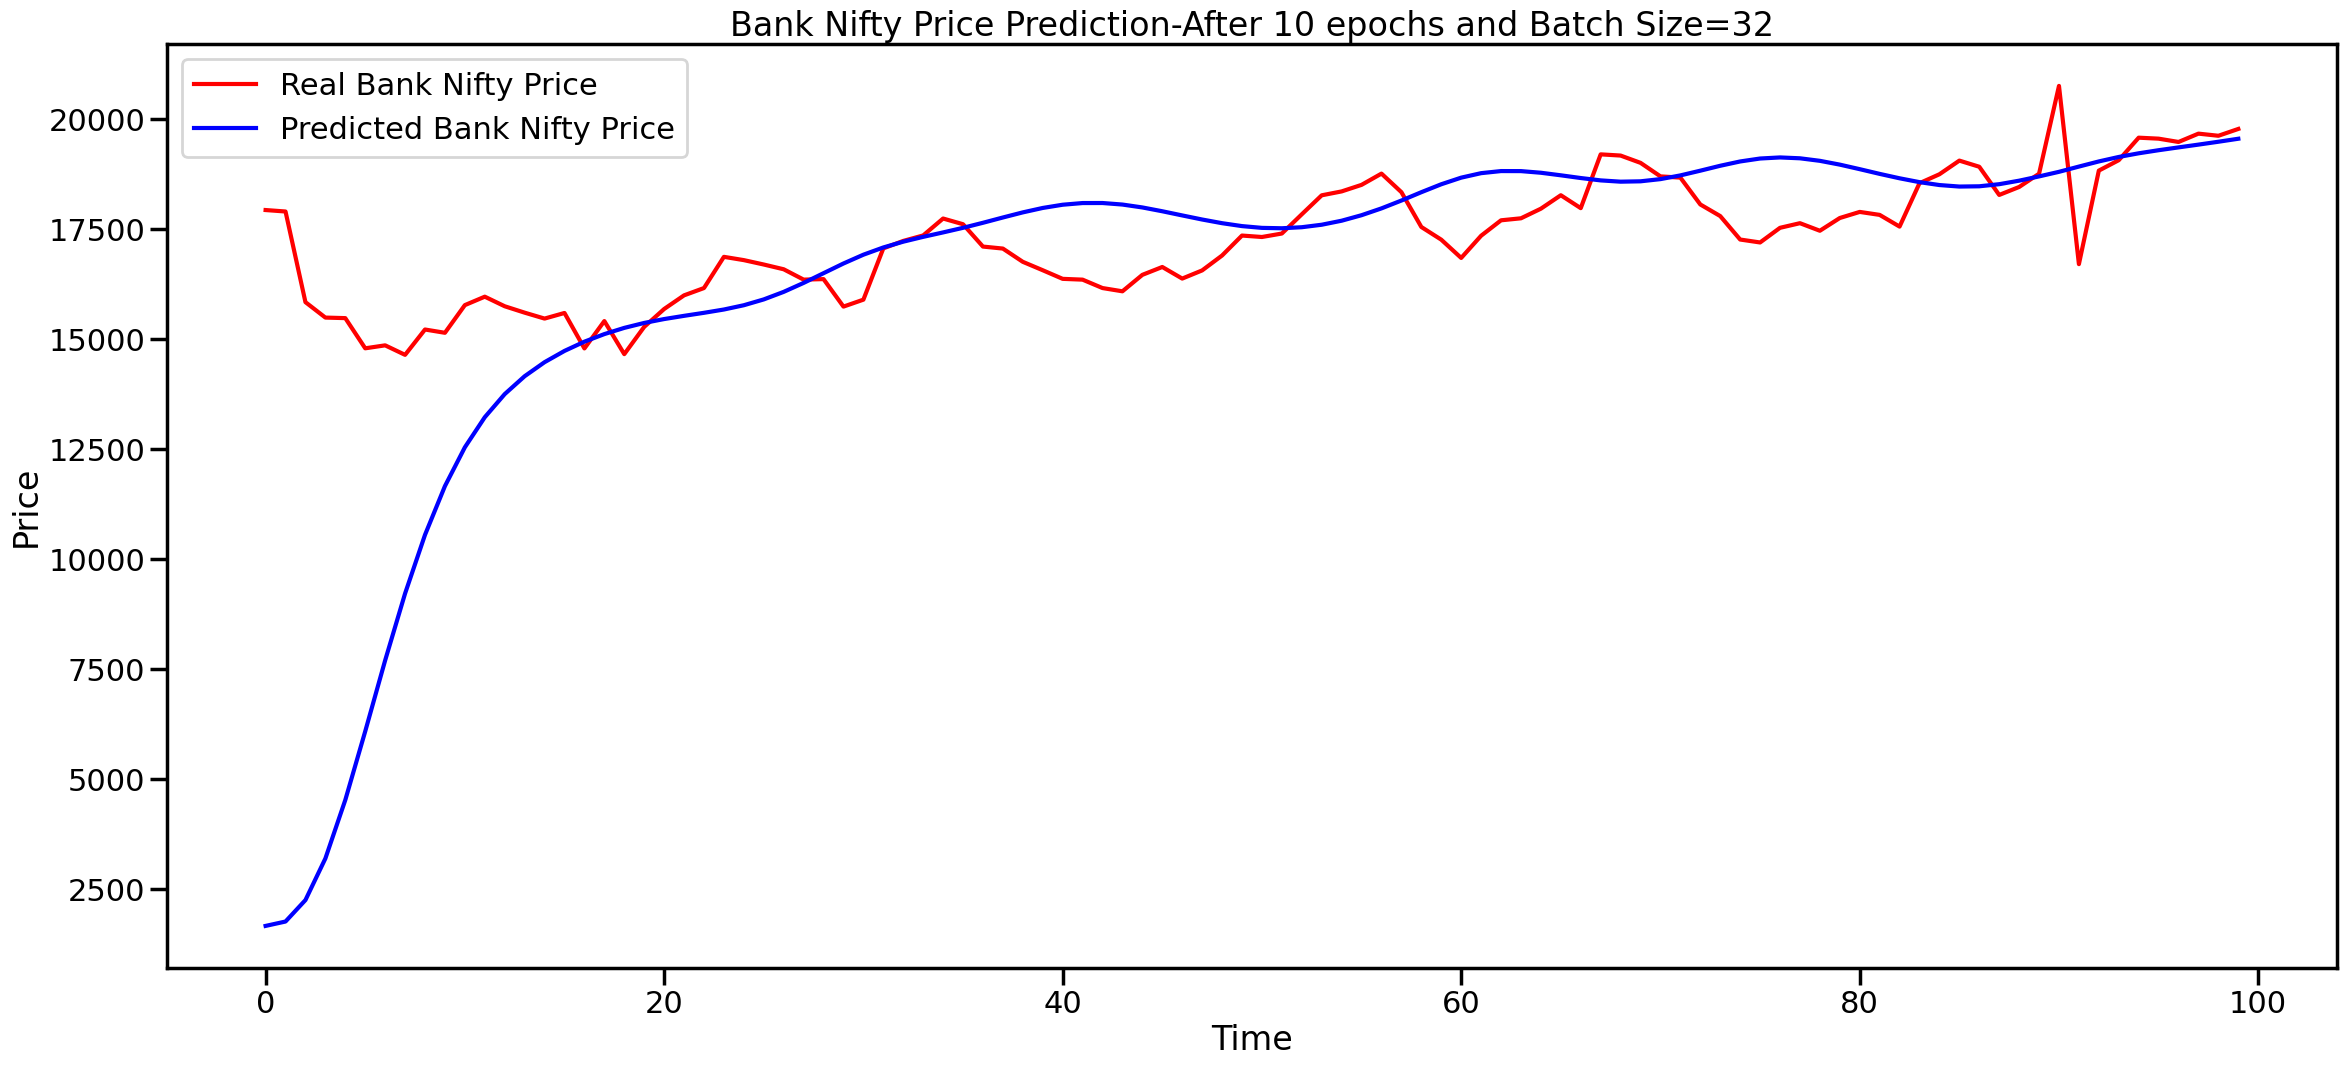

In [ ]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

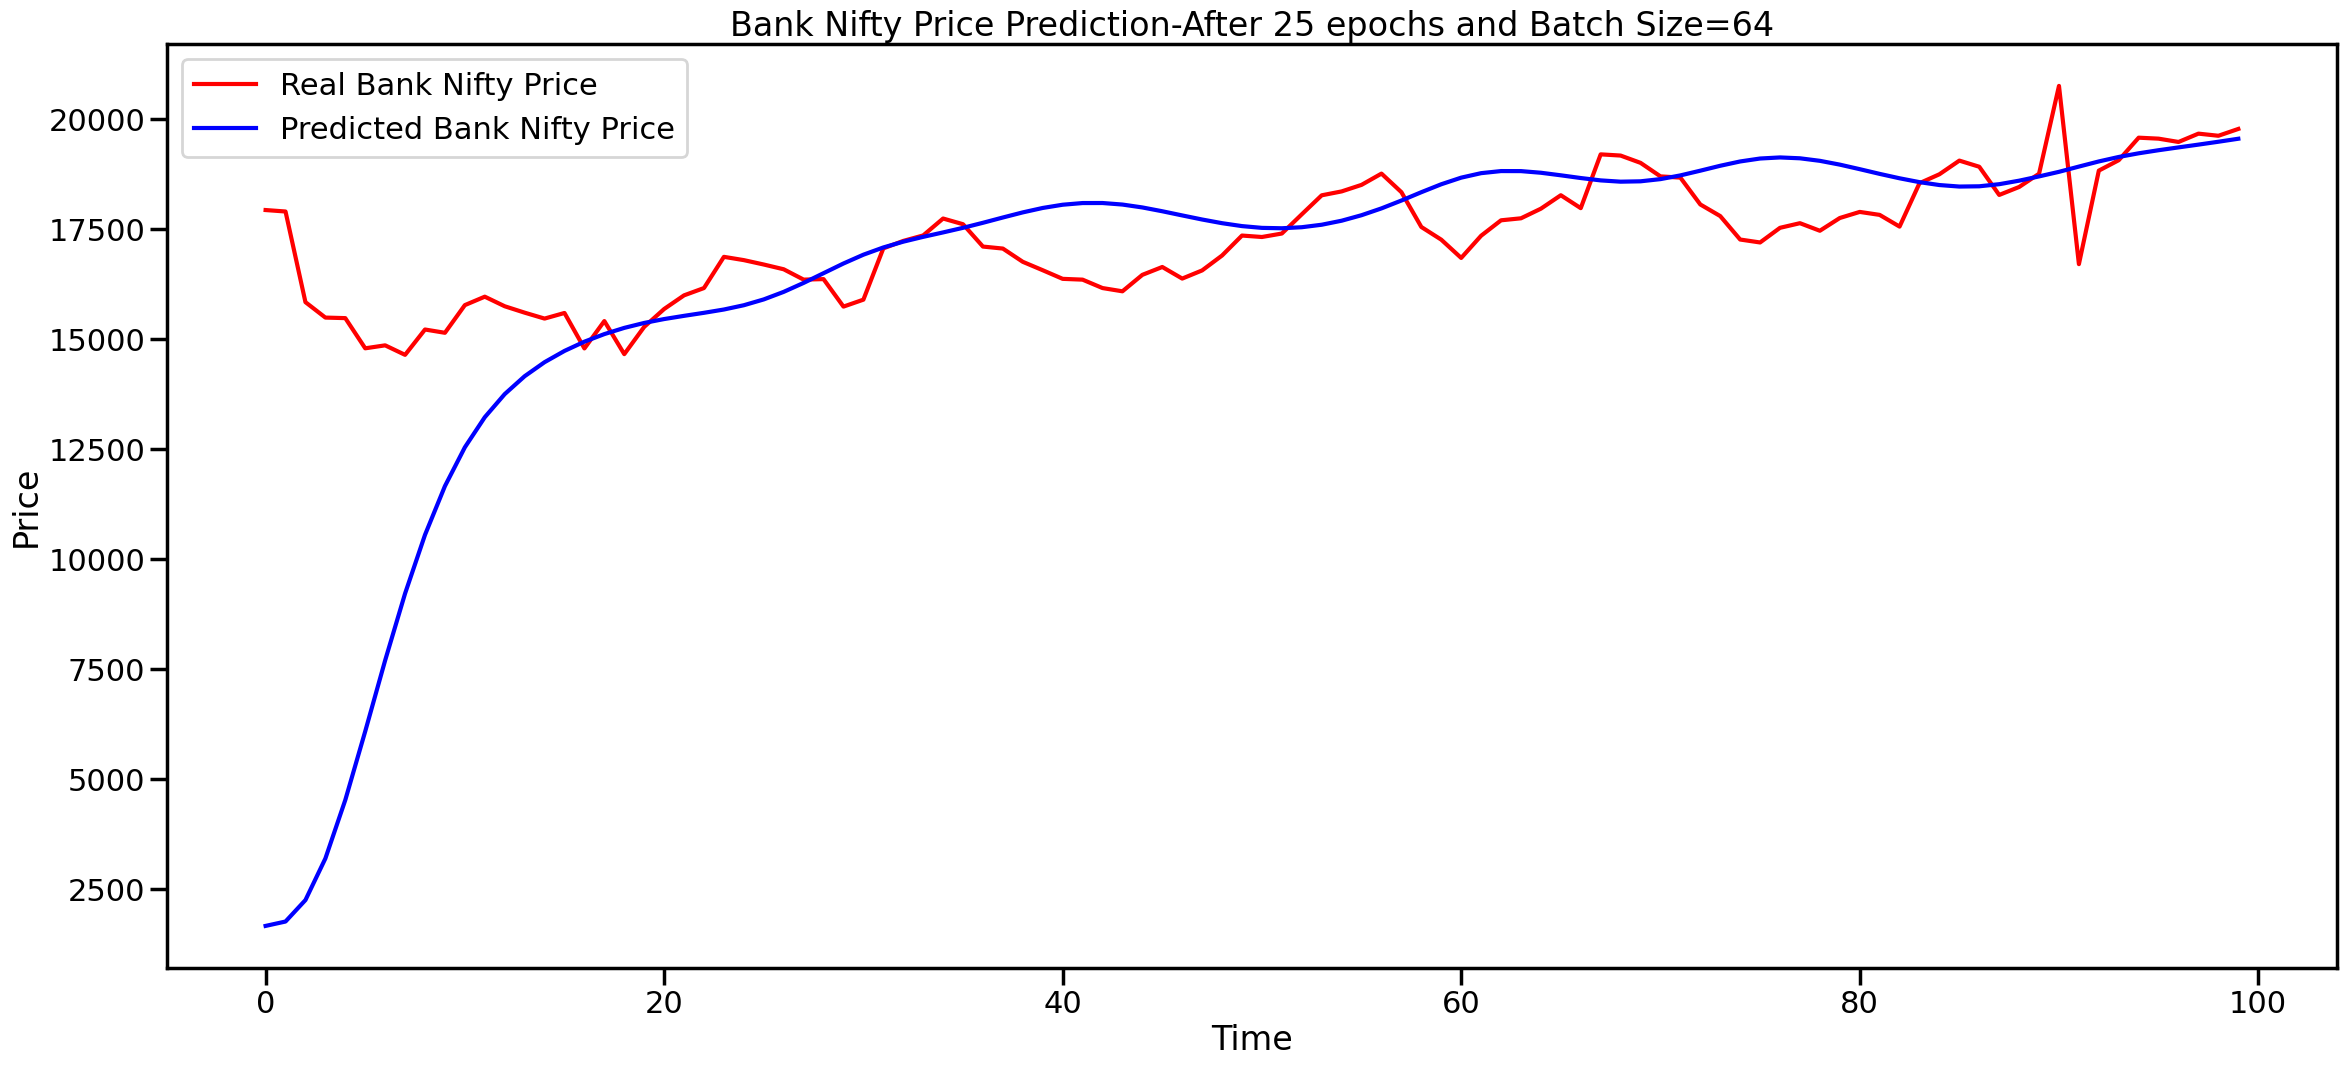

In [ ]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

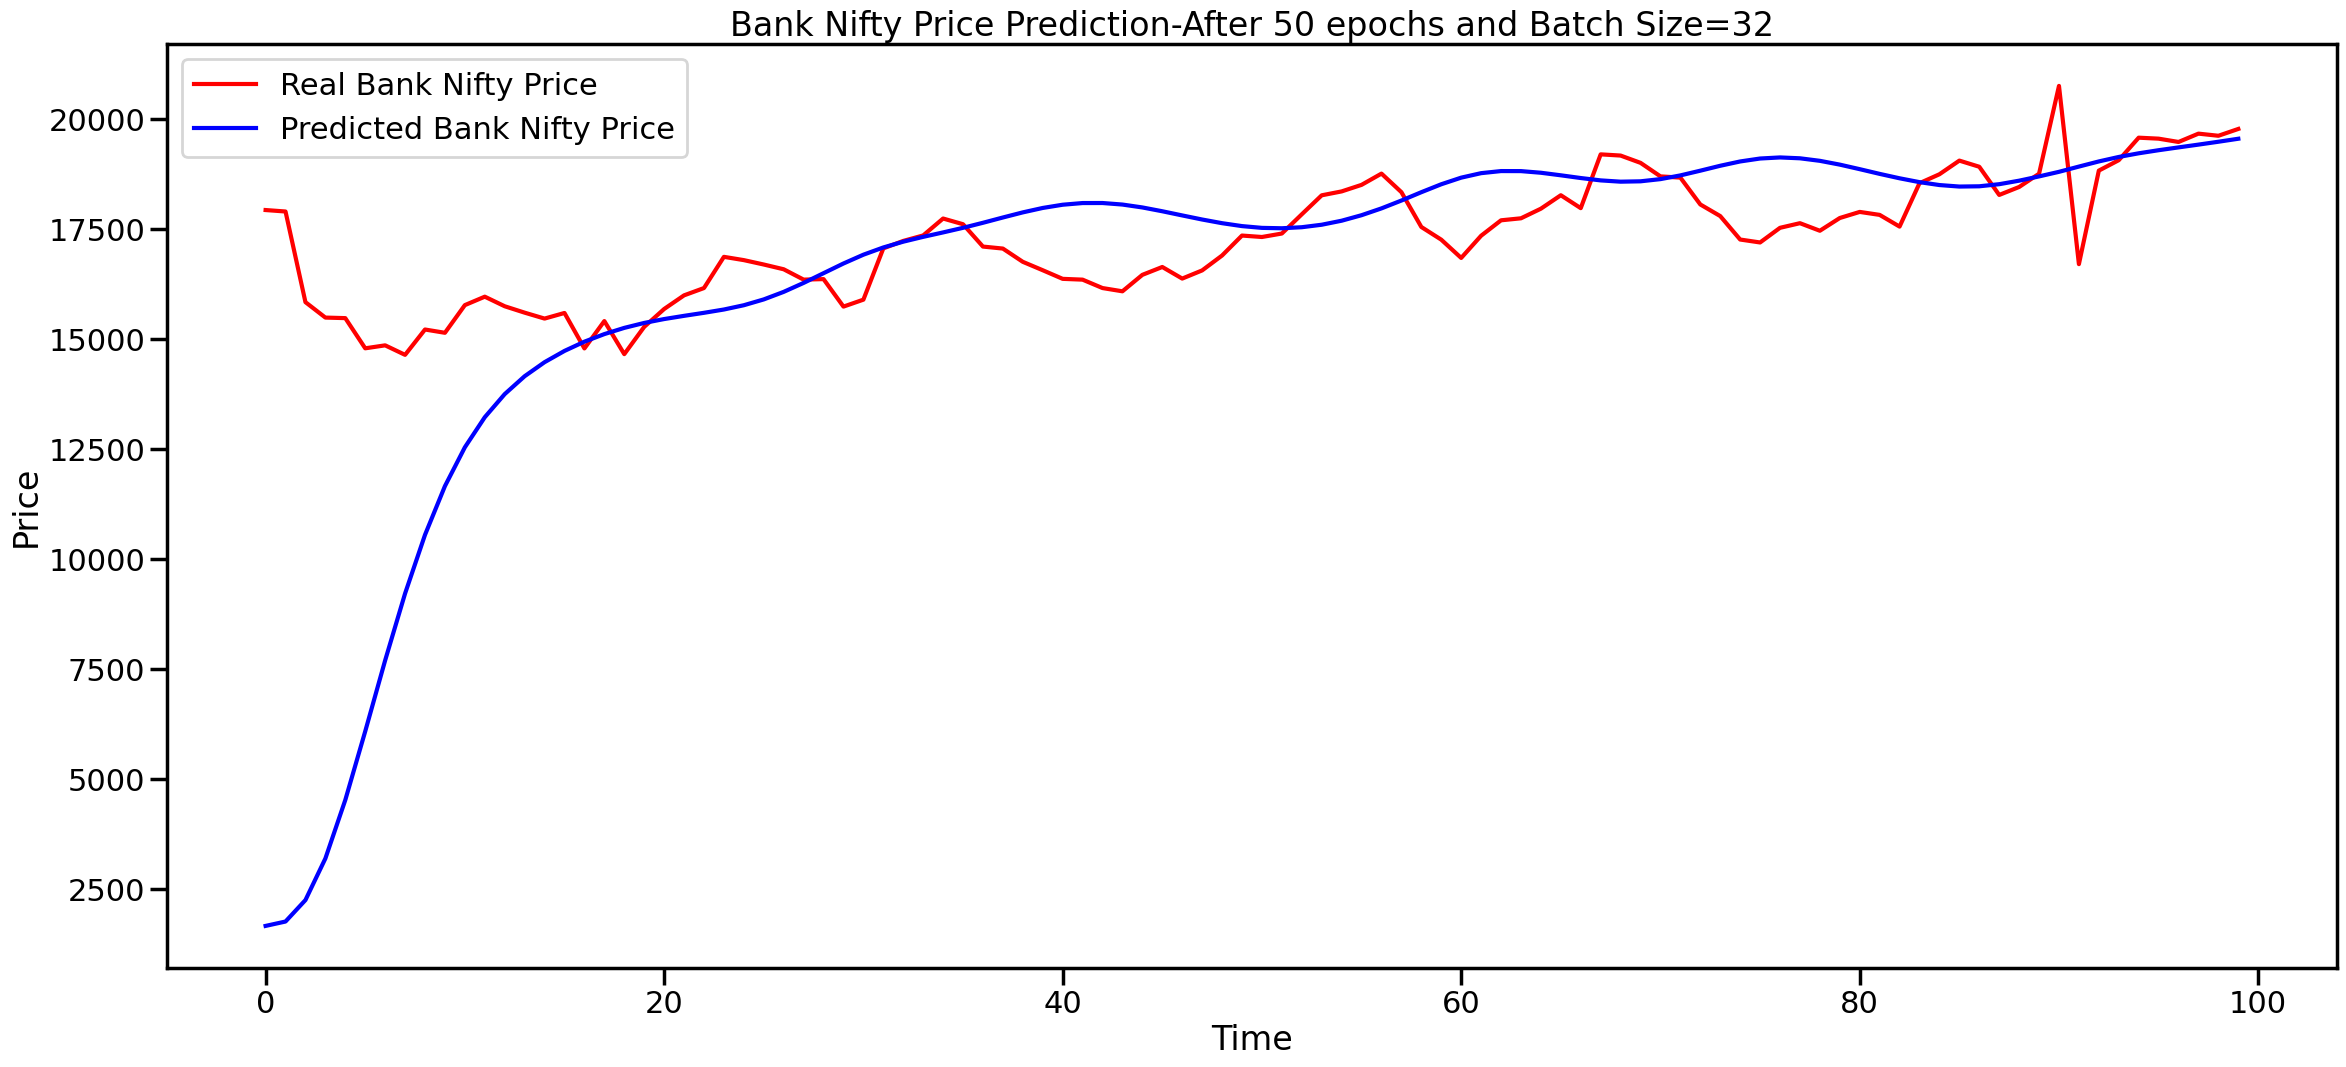

In [ ]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Bank Nifty Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bank Nifty Price')
plt.title('Bank Nifty Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()